In [6]:
import math
import numpy as np
from Grid import Grid 
from MesData import MesData
from ParaviewFile import ParaviewFile

data_4_4 = MesData('Test1_4_4.txt').data
data_mix = MesData('Test2_4_4_MixGrid.txt').data
data_trap = MesData('Test4_31_31_trapez.txt').data 
data_31_31 = MesData('Test3_31_31_kwadrat.txt').data

gr = Grid(data_4_4, 2)
gr_mix = Grid(data_mix, 2)
gr_31_31 = Grid(data_31_31, 3)
gr_trapez = Grid(data_trap, 3)

In [8]:
# Write to file
def matrix_to_string(matrix):
    return '\n'.join([' '.join(map(str, row)) for row in matrix])

for g in (['Test_4_4.txt', gr], ['Test_4_4_MixGrid.txt', gr_mix]):
    test_grid = ""
    for i in range(len(g[1].grid)):
        for j in range(len(g[1].grid[i])):
            test_grid += f'{i}, {j}\n'
            for key in g[1].grid[i][j].surface:
                try:
                    test_grid += f'{key}:\n {matrix_to_string(g[1].grid[i][j].surface[key])} \n'
                except:
                    print('error')
            with open(f'test_result/{g[0]}', 'w') as f:
                f.write(test_grid)

error
error
error
error


In [7]:
ParaviewFile(gr.data, gr.TempinTime).to_file('paraview_data/')
ParaviewFile(gr_31_31.data, gr_31_31.TempinTime).to_file('paraview_data_31_31/')
ParaviewFile(gr_mix.data, gr_mix.TempinTime).to_file('paraview_data_mix/')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


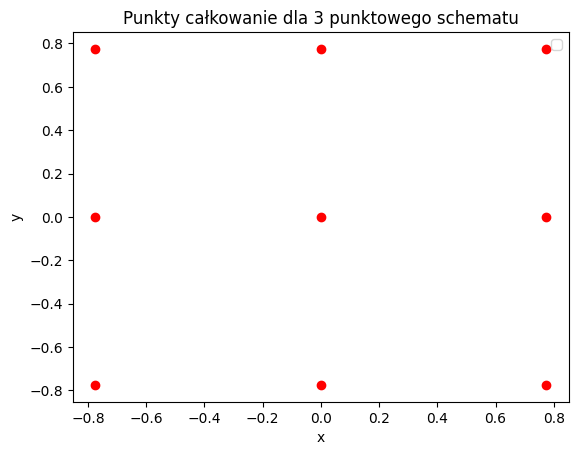

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quadrature

num_nodes = 3

nodes_x, weights_x = np.polynomial.legendre.leggauss(num_nodes)
nodes_y, weights_y = np.polynomial.legendre.leggauss(num_nodes)

nodes_combinations = np.array(np.meshgrid(nodes_x, nodes_y)).T.reshape(-1, 2)
weights_combinations = np.outer(weights_x, weights_y).reshape(-1)

def integrand(x, y):
    return x**2 + y**2

x_lower, x_upper = -1, 1
y_lower, y_upper = -1, 1

x_vals = np.linspace(x_lower, x_upper, 100)
y_vals = np.linspace(y_lower, y_upper, 100)

plt.scatter(nodes_combinations[:, 0], nodes_combinations[:, 1], color='red', marker='o')
plt.title('Punkty całkowanie dla 3 punktowego schematu')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

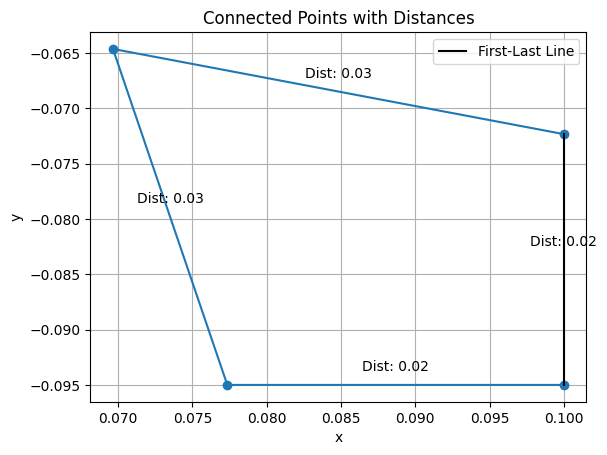

In [23]:
import numpy as np
import matplotlib.pyplot as plt
Dist = []
def calculate_distances_and_plot(x, y):

    x = np.array(x)
    y = np.array(y)

    distances = np.sqrt((np.diff(x)**2) + (np.diff(y)**2))
    Dist.append(distances)
    plt.plot(x, y, marker='o', linestyle='-')

    for i in range(len(x) - 1):
        plt.annotate(f"Dist: {distances[i]:.2f}",
                     ((x[i] + x[i + 1]) / 2, (y[i] + y[i + 1]) / 2),
                     textcoords="offset points", xytext=(0, 10), ha='center')

    plt.plot([x[0], x[-1]], [y[0], y[-1]], linestyle='-', color='black', label='First-Last Line')

    distance_first_last = np.sqrt((x[-1] - x[0])**2 + (y[-1] - y[0])**2)
    Dist.append(distance_first_last)
    plt.annotate(f"Dist: {distance_first_last:.2f}",
                 ((x[0] + x[-1]) / 2, (y[0] + y[-1]) / 2),
                 textcoords="offset points", xytext=(0, 10), ha='center')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Connected Points with Distances')
    plt.grid(True)
    plt.legend()
    plt.show()

row = 2
col = 0
x, y = gr_mix.grid[row][col].x, gr_mix.grid[row][col].y


calculate_distances_and_plot(x, y)


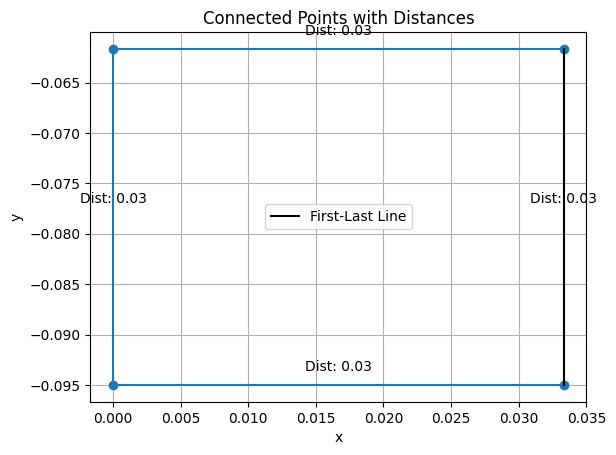

In [25]:
x, y = gr.grid[2][2].x, gr.grid[2][2].y

calculate_distances_and_plot(x, y)